In [1]:
import pandas as pd
import sys
import os

# Add the scripts directory to the Python path
sys.path.append(os.path.abspath('../scripts'))

In [2]:
import pandas as pd

# Correcting the typo in the function name and specifying the correct path
data = pd.read_csv("../data/BrentOilPrices.csv")  # Use the correct function name
data['Date'] = pd.to_datetime(data['Date'])

# Display the first few rows of the DataFrame
print(data.head())

C:\Users\Semir AI Legend\AppData\Local\Temp\ipykernel_22268\4241100378.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'])


        Date  Price
0 1987-05-20  18.63
1 1987-05-21  18.45
2 1987-05-22  18.55
3 1987-05-25  18.60
4 1987-05-26  18.63


In [3]:
print(data.isnull().sum())

Date     0
Price    0
dtype: int64


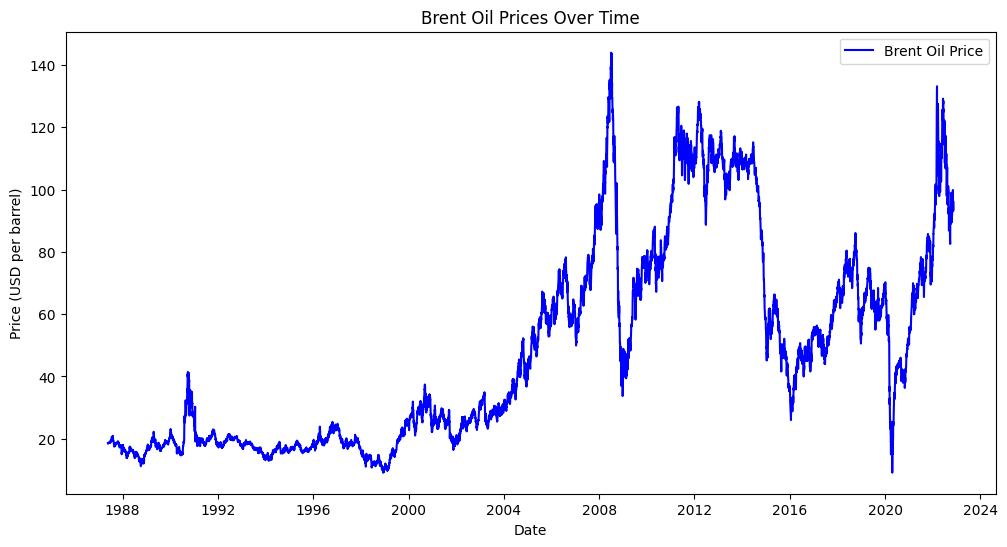

In [4]:
import matplotlib.pyplot as plt

# Plotting the Brent oil prices over time
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Price'], label='Brent Oil Price', color='blue')
plt.title('Brent Oil Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD per barrel)')
plt.legend()
plt.show()

In [5]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(data['Price'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -1.9938560113924675
p-value: 0.28927350489340287


In [6]:
# Differencing the series
data['Price_diff'] = data['Price'].diff().dropna()

# Re-run the ADF test on the differenced data
result_diff = adfuller(data['Price_diff'].dropna())
print('ADF Statistic after differencing:', result_diff[0])
print('p-value after differencing:', result_diff[1])

ADF Statistic after differencing: -15.52936758004806
p-value after differencing: 2.2307405105160745e-28


<Figure size 1200x600 with 0 Axes>

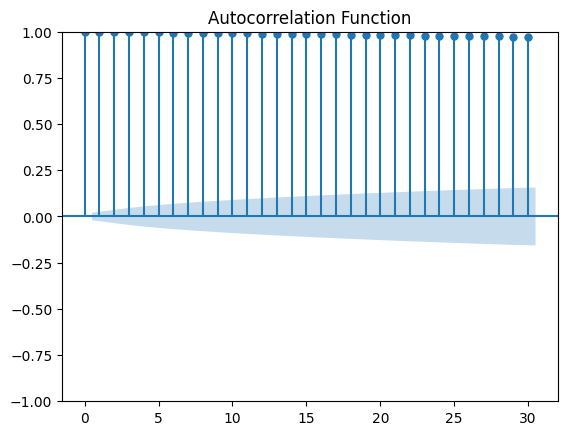

<Figure size 1200x600 with 0 Axes>

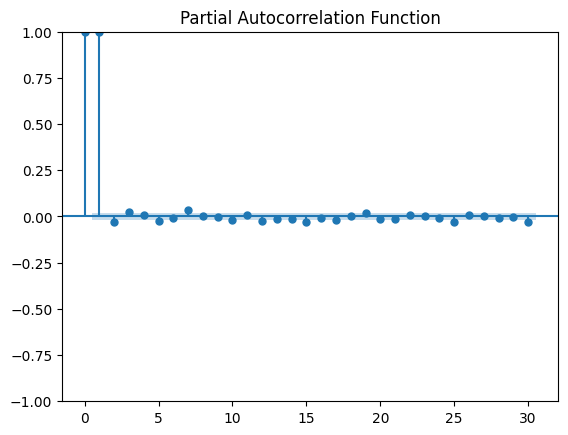

In [7]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12, 6))
plot_acf(data['Price'], lags=30)
plt.title('Autocorrelation Function')
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(data['Price'], lags=30)
plt.title('Partial Autocorrelation Function')
plt.show()

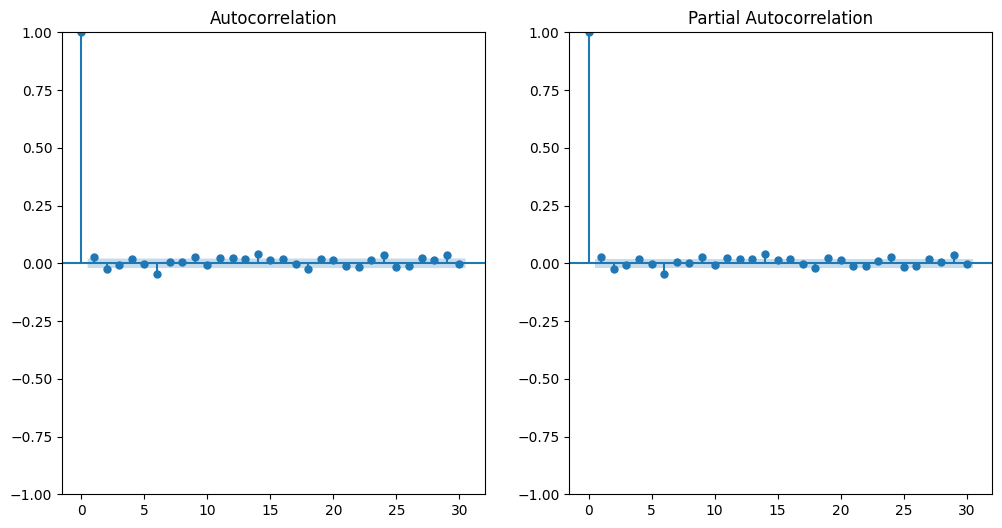

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 9011
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -14543.950
Date:                Fri, 21 Feb 2025   AIC                          29093.899
Time:                        16:48:01   BIC                          29115.218
Sample:                             0   HQIC                         29101.153
                               - 9011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3427      0.159     -2.152      0.031      -0.655      -0.031
ma.L1          0.3712      0.157      2.358      0.018       0.063       0.680
sigma2         1.4777      0.008    184.571      0.0

In [8]:
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

# ACF and PACF plots
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sm.graphics.tsa.plot_acf(data['Price_diff'].dropna(), lags=30, ax=ax[0])
sm.graphics.tsa.plot_pacf(data['Price_diff'].dropna(), lags=30, ax=ax[1])
plt.show()

# Fit the ARIMA model
p = 1  # Set based on ACF/PACF
d = 1  # We differenced once
q = 1  # Set based on ACF/PACF

model = ARIMA(data['Price'], order=(p, d, q))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

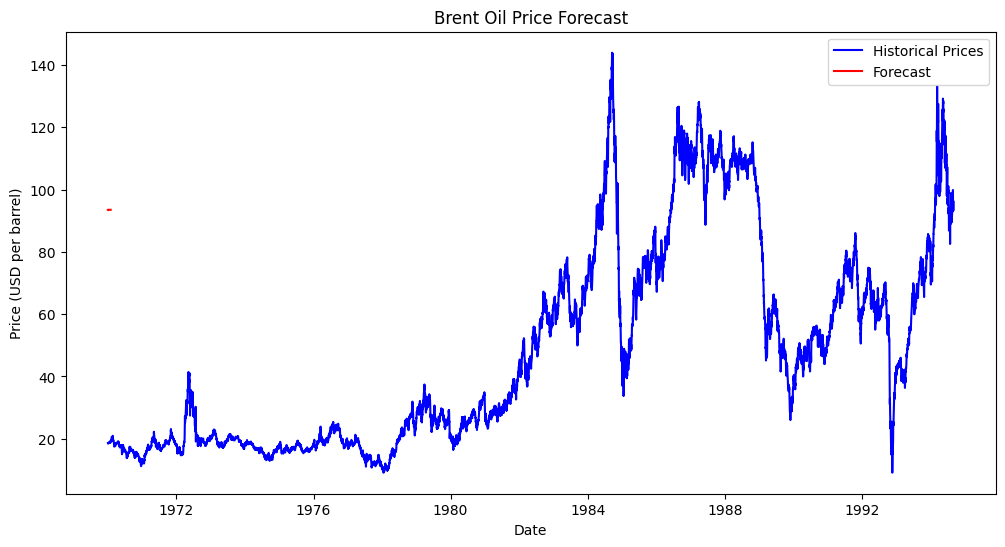

In [9]:
# Forecasting
forecast = model_fit.forecast(steps=30)  # Forecast for the next 30 days

# Plotting the historical prices and the forecast
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Price'], label='Historical Prices', color='blue')
plt.plot(pd.date_range(start=data.index[-1], periods=30, freq='D'), forecast, label='Forecast', color='red')
plt.title('Brent Oil Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price (USD per barrel)')
plt.legend()
plt.show()

In [10]:
import sys
sys.path.append(r'C:\Users\Semir AI Legend\Desktop\Oil-price-analysis\scripts')

from analyze_price_with_arima import analyze_brent_prices_with_arima

ADF Statistic: -1.9938560113924675
p-value: 0.28927350489340287


c:\Users\Semir AI Legend\Desktop\Oil-price-analysis\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Semir AI Legend\Desktop\Oil-price-analysis\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Semir AI Legend\Desktop\Oil-price-analysis\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Semir AI Legend\Desktop\Oil-price-analysis\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported inde

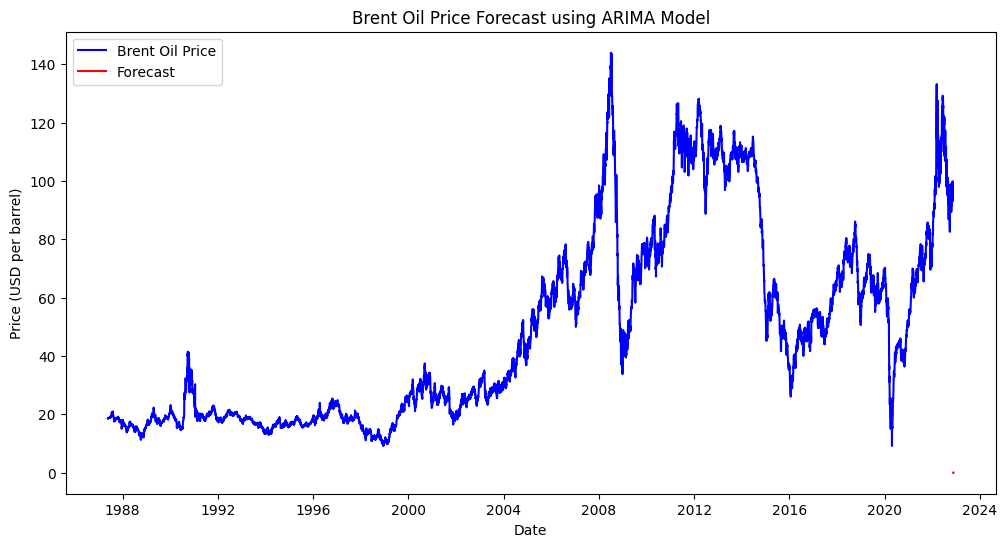

9010   -0.062187
9011    0.006919
9012    0.008676
9013    0.008721
9014    0.008722
Name: predicted_mean, dtype: float64


In [11]:
# Analyze the Brent oil prices using ARIMA
forecast, ms_model_fit = analyze_brent_prices_with_arima(data, forecast_steps=5)

# Display the forecasted values
print(forecast)

In [13]:
from lstm_data import prepare_data_for_lstm

# Prepare data for LSTM
X, y, scaler = prepare_data_for_lstm('../data/BrentOilPrices.csv', time_steps=30)

c:\Users\Semir AI Legend\Desktop\Oil-price-analysis\scripts\lstm_data.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  brent_data['Date'] = pd.to_datetime(brent_data['Date'])


In [16]:
from train_lstm import create_and_train_lstm

# Train the LSTM model
model = create_and_train_lstm(X, y, epochs=50, batch_size=32)

Epoch 1/50


c:\Users\Semir AI Legend\Desktop\Oil-price-analysis\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


281/281 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0090
Epoch 2/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 3.7865e-04
Epoch 3/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 2.8651e-04
Epoch 4/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 2.6467e-04
Epoch 5/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 2.2831e-04
Epoch 6/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 1.9380e-04
Epoch 7/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 1.7250e-04
Epoch 8/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 1.5366e-04
Epoch 9/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 1.4881e-04
Epoch 10/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 1.1346e-04
Epoch 11/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 1.1103e-04
Epoch 12/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 1.0634e-04
Epoch 13/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 1.1396e-04
Epoch 14/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 1.1877e-04
Ep